## Dataset Context

The World Happiness Report dataset contains country-level measures of life satisfaction and contributing factors such as GDP per capita, social support, life expectancy, freedom, generosity, and corruption perceptions.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading & Inspection

In [2]:
# Load dataset
df = pd.read_csv("../data/raw/happiness.csv")

# Preview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

## 2. Data Cleaning

In [3]:
# Remove missing values for relevant columns
df_clean = df.dropna()

df_clean = df_clean.rename(columns={
    "Ladder score": "Happiness score",
    "Perceptions of corruption": "Corruption",
    "Logged GDP per capita": "GDP (log)",
    "Freedom to make life choices": "Freedom",
})


# Save cleaned dataset to a csv file
df_clean.to_csv("../data/processed/happiness_clean.csv", index=False)

print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Happiness score                             153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   GDP (log)                                   153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom                                     153 non-null    float64
 10  Generosity    

In [4]:
country_col = "Country name"
region_col = "Regional indicator"
score_col = "Happiness score"
gdp_col = "GDP (log)"

## 3. Distribution of Happiness Scores

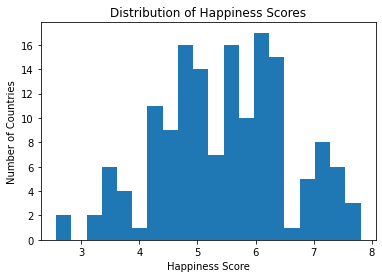

In [5]:
plt.hist(df_clean[score_col], bins=20)
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of Happiness Scores")
plt.show()

Most countries cluster between 4 and 6 on the happiness scale, with fewer countries at extreme high or low values.

## 4. Top 10 Happiest Countries

In [6]:
# Determine the top 10 happiest countries
df_clean.sort_values(score_col, ascending=False)
df_top_ten = df_clean[0:9]

print(df_top_ten[[country_col, score_col]])

  Country name  Happiness score
0      Finland           7.8087
1      Denmark           7.6456
2  Switzerland           7.5599
3      Iceland           7.5045
4       Norway           7.4880
5  Netherlands           7.4489
6       Sweden           7.3535
7  New Zealand           7.2996
8      Austria           7.2942


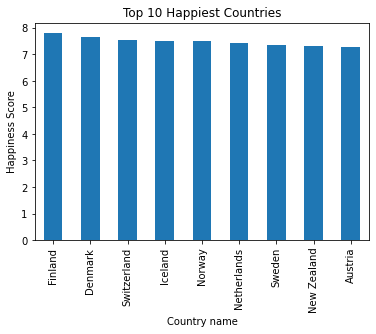

In [7]:
df_top_ten.set_index(country_col)[score_col].plot(kind="bar")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")
plt.show()

## 5. Regional Comparison

In [8]:
region_avg = df_clean.groupby(region_col)[score_col].mean().sort_values(ascending=False)
region_avg


Regional indicator
North America and ANZ                 7.173525
Western Europe                        6.899219
Latin America and Caribbean           5.981786
Central and Eastern Europe            5.883818
East Asia                             5.714850
Southeast Asia                        5.383367
Commonwealth of Independent States    5.358342
Middle East and North Africa          5.227159
South Asia                            4.475443
Sub-Saharan Africa                    4.383495
Name: Happiness score, dtype: float64

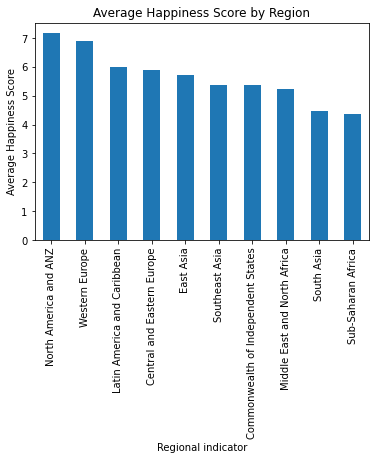

In [9]:
region_avg.plot(kind="bar")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Region")
# plt.xticks(rotation=75)
plt.show()


Western Europe and North America tend to report higher average hapiness scores compared to South Asia and Sub-Saharan Africa.

## 6. Correlation Analysis

In [12]:
key_factors = [
    "GDP (log)",
    "Social support",
    "Healthy life expectancy",
    "Freedom",
    "Generosity",
    "Corruption"
]

corr = df_clean[[score_col] + key_factors].corr()[score_col].sort_values(ascending=False)
corr


Happiness score            1.000000
GDP (log)                  0.775374
Healthy life expectancy    0.770316
Social support             0.765001
Freedom                    0.590597
Generosity                 0.069043
Corruption                -0.418305
Name: Happiness score, dtype: float64

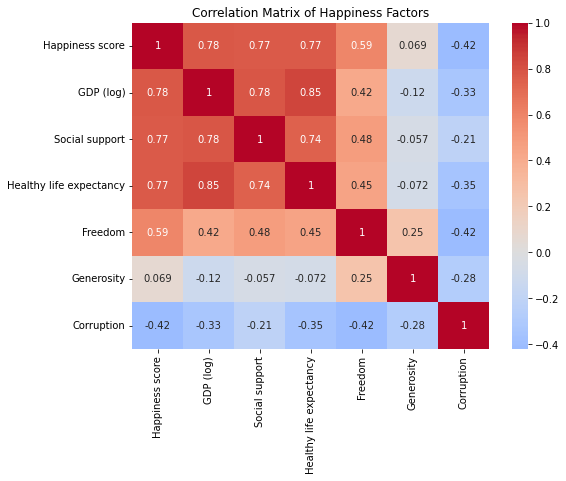

In [13]:
corr_matrix = df_clean[[score_col] + key_factors].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Happiness Factors")
plt.show()

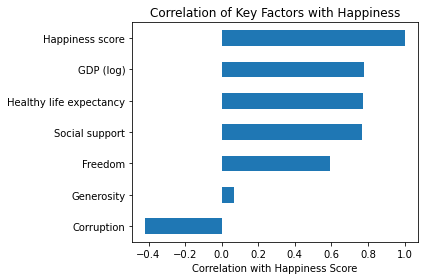

In [14]:
corr.sort_values().plot(kind="barh")
plt.xlabel("Correlation with Happiness Score")
plt.title("Correlation of Key Factors with Happiness")
plt.tight_layout()
plt.show()
